<H1> Fitting to monoexponential functions</H1>

In [1]:
%pylab inline
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


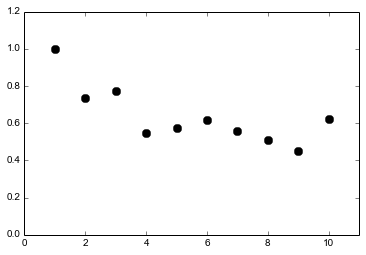

In [2]:
# plot data
data = np.loadtxt('mean-MP20Hz.txt', comments='//')
xval, yval = range(1,11), data[:,0]
plt.plot(xval,yval, 'ko', markersize=8)
plt.xlim(0,11), plt.ylim(0,1.2);

We want to fit to the following model

$f(b, \tau;t) = (1-b) * \exp(-t/\tau) + b, $

where b is the offset and $\tau$ is the time constant. We have to adjust that :

$f(b,\tau;0) = 1$



(0, 1.2)

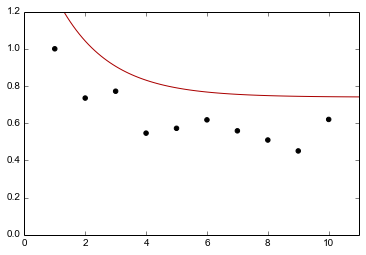

In [60]:
def mymonoexp(x, a, b, c):
    """
    returns a monoexponential function of the form:
    f(C,k;x) = \exp(k*x) + C, 
    
    where x is the independent variable
    A is the amplitude
    b is the time constant (1/tau)
    c is the offset 
    """

    return a*np.exp(-b*x) + c

#plot example
t = np.linspace(1,11,100)

myoffset = 0.74
mytau = 1.67
plt.plot(t, mymonoexp( a = 1, b=1/mytau, c=myoffset, x=t), color='#aa0000')
plt.scatter(xval, yval, color='black')
plt.xlim( 0, 11)
plt.ylim( 0, 1.2)

In [61]:
# fit to the function
popt, pcov = curve_fit(mymonoexp, xval, yval, maxfev=1000)
 
amp = popt[0]
tau = 1/popt[1]
offset = popt[2]
#tau = popt[0][1]
print('Amp = %2.4f'%offset)
print('tau = %2.4f'%tau)
print('offset = %2.4f'%offset)

Amp = 0.5359
tau = 1.7227
offset = 0.5359


array([ 0.80938236,  0.58047873,  0.53586069])

(0, 1.2)

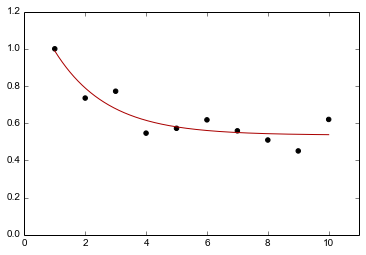

In [62]:
# plot the data together with the function
t = np.linspace(1,10,1000)
plt.plot(t, mymonoexp(a = amp, b = 1/tau, c = offset, x = t), color='#aa0000')
plt.scatter(xval, yval, color='black')
plt.xlim(0,11)
plt.ylim(0,1.2)

This is a good fit, but it has the problem of having not exactly the value of 1 at $f(x=1, a, b, c)$

In [65]:
mymonoexp(x=1, a=amp, b=1/tau, c=offset)

0.98881565598452736